# Task 1:
### Take a look at this code from http://ais.informatik.uni-freiburg.de/teaching/ss20/robotics/
### Study the code and try accessing the laser scan data at different steps
### Notice that angles are in radian which is not the case in our sensor (Task 2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi = math.pi

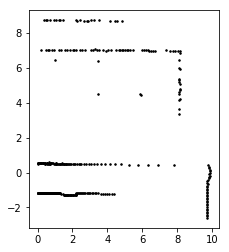

In [4]:
# a) Load laserscan and plot in scanner frame
scan = np.loadtxt('laserscan.dat')
angle = np.linspace(-pi/2, pi/2, np.shape(scan)[0], endpoint='true')
x = scan * np.cos(angle); 
y = scan * np.sin(angle);
plt.plot(x, y, '.k', markersize=3)
# Set the same scale on both axes
plt.gca().set_aspect('equal')
plt.savefig('scan1.pdf')

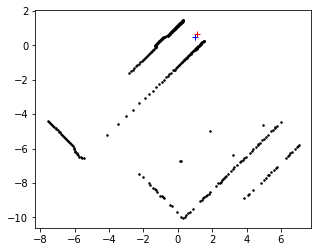

In [7]:
# c) Transform to global frame
# Define the transformation matrices
T_global_robot = np.array(
[[np.cos(pi/4), -np.sin(pi/4), 1],
[np.sin(pi/4), np.cos(pi/4), 0.5],
[0, 0, 1]])
8
T_robot_laser = np.array(
[[np.cos(pi), -np.sin(pi), 0.2],
[np.sin(pi), np.cos(pi), 0.0],
[0, 0, 1]])
# Compute the laser frame w.r.t. the global frame
T_global_laser = np.dot(T_global_robot, T_robot_laser)
# Apply the transformation to the scan points
w = np.ones(len(x))
scan_laser = np.array([x, y, w])
scan_global = np.dot(T_global_laser, scan_laser)
# Plot the laser points
plt.figure()
plt.plot(scan_global[0,:], scan_global[1,:], '.k', markersize=3)
# Plot robot pose in blue
plt.plot(T_global_robot[0,2], T_global_robot[1,2], '+b');
# Plot laser pose in red
plt.plot(T_global_laser[0,2], T_global_laser[1,2], '+r');
# Set the same scale on both axes
plt.gca().set_aspect('equal')
plt.show()
#plt.savefig(’scan2.pdf’)